In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as spy
from scipy import linalg
import pylab as py 

In [2]:
"""As input, we consider a d-dimensional vector, 
called r(t)=(ri(t))i=1,...,D. Here, t is an integer from {1...N} denoting the time step. 
That is, we have a D x N matrix."""


'As input, we consider a d-dimensional vector, \ncalled r(t)=(ri(t))i=1,...,D. Here, t is an integer from {1...N} denoting the time step. \nThat is, we have a D x N matrix.'

In [24]:
def TICA(X,lag):
    """
    Time-lagged/ time-structure-based independent component analysis.
    
    INPUT:
        - X = As input, we consider a d-dimensional vector, called r(t)=(ri(t))i=1,...,D. 
        Here, t is an integer from {1...N} denoting the time step. That is, we have a N x D matrix.
        
    OUTPUT:
        - 
    """
    
    T=len(X)
    D=len(X[0])
    
    X_0 = X[[i for i in range(T-lag)],:]
    X_lag = X[[lag+i for i in range(T-lag)],:]
    
    C_0 = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_0))
    C_lag = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_lag))
    
    #enforce symmetry:
    # if 
    #C_0 = (1/2)*((np.transpose(X_0))*(X_0)+(np.transpose(X_lag))*(X_lag))
    #C_lag = (1/2)*((np.transpose(X_0))*(X_lag)+(np.transpose(X_lag))*(X_0))
    
    U = spy.linalg.eig(C_lag,C_0)[1]
    Z = np.dot(X,U)
    return Z

In [78]:
s=np.array([[1,2],[3,4]])
s.T

array([[1, 3],
       [2, 4]])

In [47]:
Xa=np.random.rand(5,5)
print(Xa.size)
TICA(Xa,2).size

25


25

[None, None]

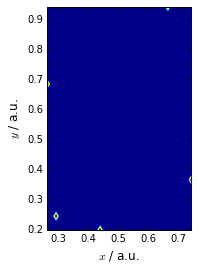

In [77]:
h, xedges, yedges = np.histogram2d(Xa[:, 0], Xa[:, 1], bins=(50, 50))
xcenters = xedges[:-1] + 0.5 * (xedges[1:] - xedges[:-1])
ycenters = yedges[:-1] + 0.5 * (yedges[1:] - yedges[:-1])
x, y = np.meshgrid(xcenters, ycenters, indexing='ij')
fig, ax = plt.subplots()
ax.contourf(x, y, h, np.linspace(h.min(), h.max(), 60))
ax.set_xlabel(r"$x$ / a.u.", fontsize=12)
ax.set_ylabel(r"$y$ / a.u.", fontsize=12)
ax.set(aspect='equal', adjustable='box-forced')

In [6]:
a=np.matrix([[1,1],[2,3],[3,4]])
b=np.transpose(a)
np.dot(b,a)

matrix([[14, 19],
        [19, 26]])

In [18]:
T=len(Xa)
D=len(Xa[0])

lag=5

X_0 = Xa[[i for i in range(T-lag)],:]
X_lag = Xa[[lag+i for i in range(T-lag)],:]

C_0 = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_0))
C_lag = (1/(T-lag-1))*(np.dot(np.transpose(X_0),X_lag))

print(C_0.size)
print(C_lag.size)

(spy.linalg.eig(C_0,C_lag)[1]).size

400
400


400

In [ ]:
py.plot(Xa,[i for i in range(len(Xa))],'o',linestyle='--')
py.show()